In [1]:
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#加载数据集
iris = datasets.load_iris()
data = np.array(iris.data)
target=iris.target

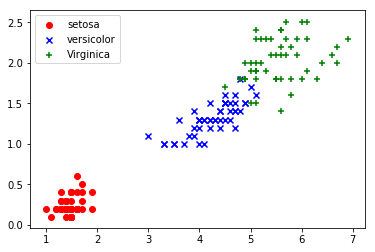

In [3]:
X = [x[2] for x in data]  
Y = [x[3] for x in data]  

#plt.scatter(X, Y, c=iris.target, marker='x')
plt.scatter(X[:50], Y[:50], color='red', marker='o', label='setosa') #前50个样本
plt.scatter(X[50:100], Y[50:100], color='blue', marker='x', label='versicolor') #中间50个
plt.scatter(X[100:], Y[100:],color='green', marker='+', label='Virginica') #后50个样本
plt.legend(loc=2) #左上角
plt.show()

In [4]:
# def distance(p1,p2):  # 欧式距离
#     return  np.linalg.norm(p1-p2)
#高斯核函数得出邻接矩阵
def gaussian_kernel(data,sigma = 1):

    kernel = np.zeros([150,150])
    s = 2*(sigma**2)
    for i in range(0,150):
        for j in range(0,150):
            for l in range(4):
                mol = np.sum(((data[i][l]-data[j][l])**2))
            kernel[i,j] = np.exp(-(mol) / s)
    return kernel

In [5]:
GW = gaussian_kernel(data)

In [7]:
def width(lst):
    i=0
    for j in lst[0]:
        i=i+1
    return i

In [8]:
def JHW(W,r):
    for i in range(width(W)):
        for j in range(width(W)):
            if W[i][j]<r:
                W[i][j]=0
            else:
                W[i][j]=1
    return W

In [9]:
W = JHW(GW,0.89)

In [10]:
#得出度数矩阵
def getD(W):    # 获得度矩阵
    points_num = len(W)
    D = np.diag(np.zeros(points_num))
    for i in range(points_num):
        D[i][i] = sum(W[i])
    return D

In [11]:
D = getD(W)
D

array([[50.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 50.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 50., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 49.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 34.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 58.]])

In [12]:
#归一化拉普拉斯矩阵
def AutoNorm(mat):   
    n=len(mat)
    m=width(mat)     
    MinNum=[9999999999]*m
    MaxNum = [0]*m    
    for i in mat:
        for j in range(0,m):
            if i[j]>MaxNum[j]:
                MaxNum[j]=i[j]
      
    for p in mat:     
        for q in range(0,m):
            if p[q]<=MinNum[q]:
                    MinNum[q]=p[q]  
                          
    section=list(map(lambda x: x[0]-x[1], zip(MaxNum, MinNum)))
    NormMat=[]
     
    for k in mat:
        distance=list(map(lambda x: x[0]-x[1], zip(k, MinNum)))
        value=list(map(lambda x: x[0]/x[1], zip(distance,section)))
        NormMat.append(value)           
    return NormMat   

In [14]:
##拉普拉斯矩阵非对称的归一化后为GL
L = D - W
GL = np.array(AutoNorm(L))

In [15]:
#从拉普拉斯矩阵获得特征矩阵
def getEigVec(L,cluster_num):  
    eigval,eigvec = np.linalg.eig(L)
#     dim = len(eigval)
#     dictEigval = dict(zip(eigval,range(0,dim)))
#     kEig = np.sort(eigval)[0:cluster_num]
#     ix = [dictEigval[k] for k in kEig]
    return eigval,eigvec

In [16]:
#得到特征值特征向量
cluster_num = 150
eigval,eigvec = getEigVec(GL,cluster_num)

In [19]:
# 特征值对应的索引从小到大排列，argsort函数
indices = np.argsort(eigval)

In [20]:
#选取前k个特征值对应的特征向量组成矩阵
topk_evecs = eigvec[:,indices[:3:1]]
U = topk_evecs

In [21]:
#对U进行归一化，得到矩阵Y
Y = np.array(AutoNorm(U))

In [38]:
estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(Y)#聚类
label_pred = estimator.labels_ #获取聚类标签
label_pred

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(label_pred,target)

0.96

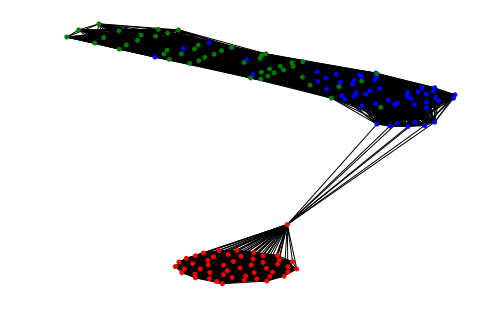

In [40]:
import networkx as nx 

G=nx.Graph()
#创建150个结点
for i in range(150):
    G.add_node(i)
#将邻接矩阵有连接的保存在edglist中
edglist=[]
for i in range(150):
    for j in range(150):
        if(W[i][j]==1):
            edglist.append((i,j))
colorlist=[]
for i in range(150):
    if(label_pred[i]==0):
        colorlist.append('r')
    elif(label_pred[i]==1):
        colorlist.append('b')
    else:
        colorlist.append('g')
G=nx.Graph(edglist)
nx.draw(G,node_color = colorlist,node_size =15)
plt.show()